In [43]:
import pandas as pd
import numpy as np
# Import Data
raw_data = pd.read_csv('Train_UWu5bXk.csv')
raw_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
# Null Values
pd.isnull(raw_data).sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# First let us replace 0 visibility with the mean of that product. 

In [45]:
raw_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDF52     9
NCL31     9
FDD38     9
         ..
FDC23     1
FDY43     1
FDK57     1
FDN52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [46]:
# Mean of product depending on its ID. 
avg_Item_Visibility=raw_data.groupby('Item_Identifier',as_index=False).agg({'Item_Visibility':'mean'})
avg_Item_Visibility

,Item_Identifier,Item_Visibility
0,DRA12,0.031956
1,DRA24,0.048062
2,DRA59,0.134718
3,DRB01,0.082126
4,DRB13,0.008002
...,...,...
1554,NCZ30,0.024956
1555,NCZ41,0.051623
1556,NCZ42,0.009044
1557,NCZ53,0.027775


In [47]:
# Picking up rows with a specific identifier. ****Before replacing with mean****
ID=[]
for i in range(len(raw_data)):
    if raw_data['Item_Identifier'][i]=='FDP33':
        ID.append(raw_data.iloc[i])
ID=pd.DataFrame(ID)
ID

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
32,FDP33,18.7,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
729,FDP33,18.7,Low Fat,0.089272,Snack Foods,254.7672,OUT046,1997,Small,Tier 1,Supermarket Type1,5113.3440
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
5620,FDP33,18.7,LF,0.089777,Snack Foods,256.4672,OUT017,2007,NaN,Tier 2,Supermarket Type1,5369.0112
7221,FDP33,NaN,Low Fat,0.156304,Snack Foods,256.3672,OUT019,1985,Small,Tier 1,Grocery Store,255.6672
7677,FDP33,18.7,Low Fat,0.089198,Snack Foods,257.3672,OUT013,1987,High,Tier 3,Supermarket Type1,2045.3376


In [48]:
# Picking up rows which has 0 Visibility. 
V0=[]
for i in range(len(raw_data)):
    if raw_data['Item_Visibility'][i]==0:
        V0.append(raw_data.iloc[i])
V0=pd.DataFrame(V0)
V0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [49]:
# Replace the 0 values with the mean of that specific ID
area_dict = dict(zip(avg_Item_Visibility.Item_Identifier, avg_Item_Visibility.Item_Visibility)) # Converting mean dataset into dictionary
V0['Item_Visibility'] = raw_data['Item_Identifier'].map(area_dict) # Replacing 0s with means

In [50]:
# Drop rows with 0 Visibility in the original dataset
raw_data.drop(raw_data[raw_data['Item_Visibility'] == 0].index, inplace = True) 

In [51]:
# Now add back deleted rows which are now replaced by means. 
clean_data_1 = raw_data.append(V0) 
clean_data_1=clean_data_1.sort_index()

In [52]:
# Picking up rows with a specific identifier.****After replacing with mean****
y=[]
for i in range(len(clean_data_1)):
    if clean_data_1['Item_Identifier'][i]=='FDP33':
        y.append(clean_data_1.iloc[i])
y=pd.DataFrame(y)
y

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
32,FDP33,18.7,Low Fat,0.085565,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
729,FDP33,18.7,Low Fat,0.089272,Snack Foods,254.7672,OUT046,1997,Small,Tier 1,Supermarket Type1,5113.3440
4349,FDP33,NaN,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
5620,FDP33,18.7,LF,0.089777,Snack Foods,256.4672,OUT017,2007,NaN,Tier 2,Supermarket Type1,5369.0112
7221,FDP33,NaN,Low Fat,0.156304,Snack Foods,256.3672,OUT019,1985,Small,Tier 1,Grocery Store,255.6672
7677,FDP33,18.7,Low Fat,0.089198,Snack Foods,257.3672,OUT013,1987,High,Tier 3,Supermarket Type1,2045.3376


In [53]:
clean_data_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
avg_Item_Visibility

,Item_Identifier,Item_Visibility
0,DRA12,0.031956
1,DRA24,0.048062
2,DRA59,0.134718
3,DRB01,0.082126
4,DRB13,0.008002
...,...,...
1554,NCZ30,0.024956
1555,NCZ41,0.051623
1556,NCZ42,0.009044
1557,NCZ53,0.027775


# Now let us replace null Weights with the mean of that product.

In [55]:
# Mean of product depending on its ID. 
clean_data_1['Item_Weight']=clean_data_1['Item_Weight'].fillna(0)
avg_Item_Weight=clean_data_1.groupby('Item_Identifier',as_index=False).agg({'Item_Weight':'mean'})
avg_Item_Weight

,Item_Identifier,Item_Weight
0,DRA12,11.600000
1,DRA24,13.821429
2,DRA59,6.202500
3,DRB01,4.926667
4,DRB13,6.115000
...,...,...
1554,NCZ30,5.648571
1555,NCZ41,19.850000
1556,NCZ42,10.500000
1557,NCZ53,7.680000


In [56]:
# Picking up rows which has 0 Weight. 

W0=[]
for i in range(len(raw_data)):
    if clean_data_1['Item_Weight'][i]==0:
        W0.append(clean_data_1.iloc[i])
W0=pd.DataFrame(W0)
len(W0)

1374

In [57]:
# Replace the 0 values with the mean of that specific ID
avgWtDic = dict(zip(avg_Item_Weight.Item_Identifier, avg_Item_Weight.Item_Weight)) # Converting mean dataset into dictionary
W0['Item_Weight'] = clean_data_1['Item_Identifier'].map(avgWtDic) # Replacing 0s with means

In [58]:
# Drop rows with 0 Weights in the original dataset
clean_data_1.drop(clean_data_1[clean_data_1['Item_Weight'] == 0].index, inplace = True) 
# Now add back deleted rows which are now replaced by means. 
clean_data_2 = clean_data_1.append(W0) 
clean_data_2=clean_data_2.sort_index()

In [59]:
pd.isnull(clean_data_2).sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

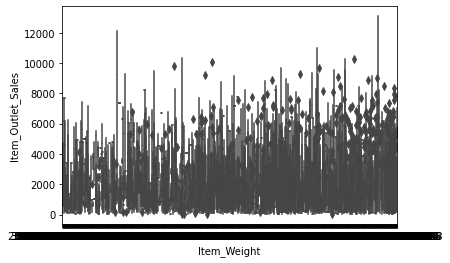

In [60]:
# Seaborn visualization library
import seaborn as sns
sns.boxplot(clean_data_2.Item_Weight,clean_data_2.Item_Outlet_Sales)

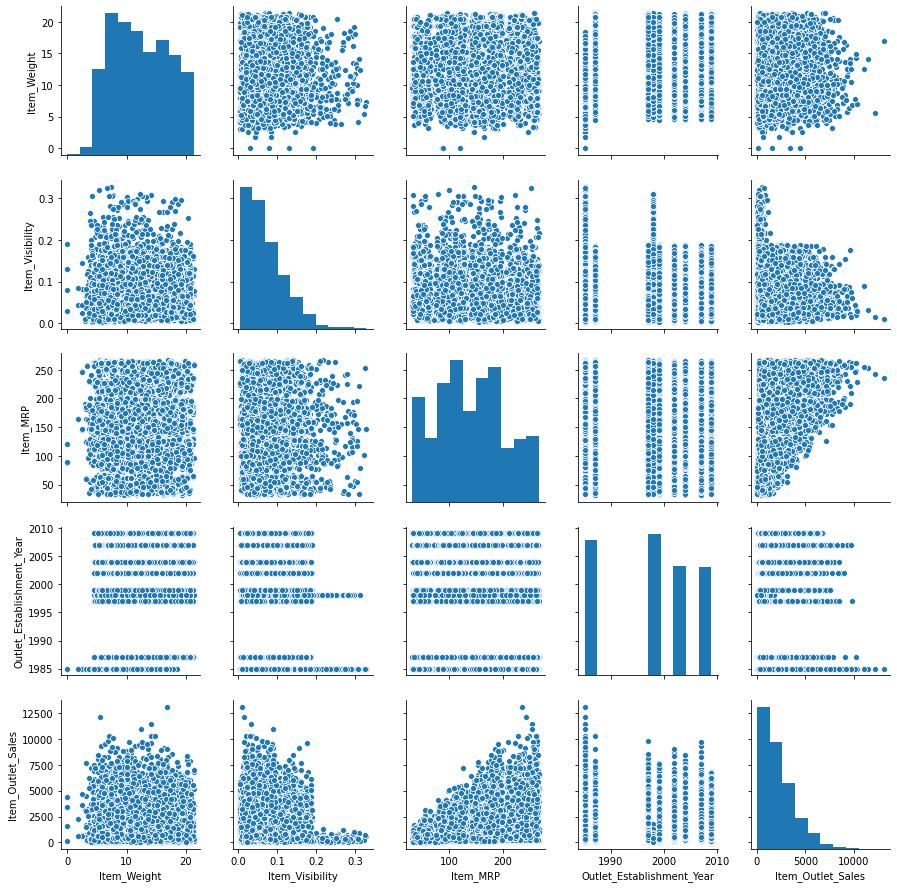

In [19]:
# Create the default pairplot
sns.pairplot(clean_data_2)

Item_MRP is positively correlated with Item_Outlet_Sales 

Item_Visibility is negatively correlated with Item_Outlet_Sales

Item_Weight and Outlet_Establishment_Year looks like no impact on the Item_Outlet_Sales

In [20]:
clean_data_2['Outlet_Establishment_Year'] = 2013 - clean_data_2['Outlet_Establishment_Year']
clean_data_2['Outlet_Establishment_Year'].describe()

count    8434.000000
mean       15.032725
std         8.310834
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Establishment_Year, dtype: float64

In [21]:
clean_data_2['Item_Fat_Content'].value_counts()

Low Fat    5036
Regular    2859
LF          311
reg         117
low fat     111
Name: Item_Fat_Content, dtype: int64

In [22]:
clean_data_2['Item_Fat_Content']=clean_data_2['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat', 'Regular','Low Fat'])
clean_data_2['Item_Fat_Content'].value_counts()

Low Fat    5458
Regular    2976
Name: Item_Fat_Content, dtype: int64

In [23]:
for i in range(len(raw_data)):
    if clean_data_2["Item_Identifier"][i][0:2]=='FD':
        clean_data_2['Item_Identifier']=clean_data_2['Item_Identifier'].replace(clean_data_2['Item_Identifier'][i],'FD')
    elif clean_data_2["Item_Identifier"][i][0:2]=='DR':
        clean_data_2['Item_Identifier']=clean_data_2['Item_Identifier'].replace(clean_data_2['Item_Identifier'][i],'DR')
    elif clean_data_2["Item_Identifier"][i][0:2]=='NC':
        clean_data_2['Item_Identifier']=clean_data_2['Item_Identifier'].replace(clean_data_2['Item_Identifier'][i],'HHH')
    else:
        continue

In [24]:
ID = {"FD": "Food", "DR": "Drinks", "HHH":"Household, Health and Hygiene "}
clean_data_2['Item_Type'] = clean_data_2['Item_Identifier'].map(ID)
#raw_data=raw_data.drop(['Item_Identifier'], axis=1)
clean_data_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Food,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Food,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.015274,Food,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,HHH,8.930,Low Fat,0.008082,"Household, Health and Hygiene",53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Food,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Food,108.1570,OUT045,11,NaN,Tier 2,Supermarket Type1,549.2850
8520,HHH,10.600,Low Fat,0.035186,"Household, Health and Hygiene",85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Food,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


HHH is non-consumable. So it can't have fat content 

Therefore, we create a new category for for that

In [25]:
for i in range(len(raw_data)):
    if clean_data_2["Item_Identifier"][i]=='HHH':
        clean_data_2['Item_Fat_Content'][i]=clean_data_2['Item_Fat_Content'][i].replace(clean_data_2['Item_Fat_Content'][i],'Non_Edible')
    else:
        continue

C:\Users\banak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
clean_data_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Food,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Food,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.015274,Food,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,HHH,8.93,Non_Edible,0.008082,"Household, Health and Hygiene",53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


In [27]:
clean_data_2["Outlet_Size"].value_counts()

Medium    2737
Small     2355
High       932
Name: Outlet_Size, dtype: int64

In [28]:
# Filling the nulls with least common value instead of most common value just to balance  the dataset
clean_data_2["Outlet_Size"]=clean_data_2["Outlet_Size"].fillna("Medium") 
clean_data_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Food,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Food,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.015274,Food,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800
4,HHH,8.93,Non_Edible,0.008082,"Household, Health and Hygiene",53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052


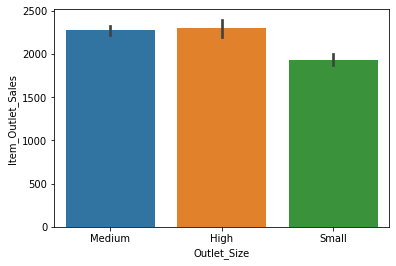

In [29]:

sns.barplot(clean_data_2["Outlet_Size"],clean_data_2["Item_Outlet_Sales"])

In [30]:
clean_data_2["Outlet_Size"].value_counts()

Medium    5147
Small     2355
High       932
Name: Outlet_Size, dtype: int64

In [31]:
clean_data_2["Item_Identifier"].value_counts()

FD     6061
HHH    1579
DR      794
Name: Item_Identifier, dtype: int64

In [32]:
raw_data["Outlet_Type"].value_counts()


Supermarket Type1    5235
Grocery Store        1024
Supermarket Type3     875
Supermarket Type2     863
Name: Outlet_Type, dtype: int64

In [33]:
clean_data_2=pd.get_dummies(clean_data_2, columns=["Item_Type","Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type",'Outlet_Identifier'], prefix=["iType","iFatContent", "oSize", "oLocation", "oType","oID"])

In [34]:
clean_data_2["ioSales"]=clean_data_2["Item_Outlet_Sales"]
clean_data_2=clean_data_2.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)

In [35]:
clean_data_2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,iType_Drinks,iType_Food,"iType_Household, Health and Hygiene",iFatContent_Low Fat,iFatContent_Non_Edible,iFatContent_Regular,...,oID_OUT013,oID_OUT017,oID_OUT018,oID_OUT019,oID_OUT027,oID_OUT035,oID_OUT045,oID_OUT046,oID_OUT049,ioSales
0,9.300,0.016047,249.8092,14,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3735.1380
1,5.920,0.019278,48.2692,4,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,443.4228
2,17.500,0.016760,141.6180,14,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2097.2700
3,19.200,0.015274,182.0950,15,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,732.3800
4,8.930,0.008082,53.8614,26,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,2778.3834
8519,8.380,0.046982,108.1570,11,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,549.2850
8520,10.600,0.035186,85.1224,9,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1193.1136
8521,7.210,0.145221,103.1332,4,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1845.5976


In [36]:
# Splitting X and y
y = clean_data_2['ioSales'] 
X = clean_data_2.drop(['ioSales'], axis = 1)
# Splitting train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 143)

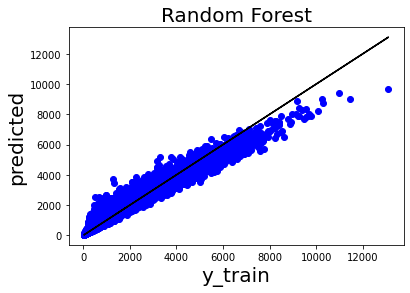

R2 score on train set= 0.94
MSE on train set= 177328.60
RMSE on train set= 421.10


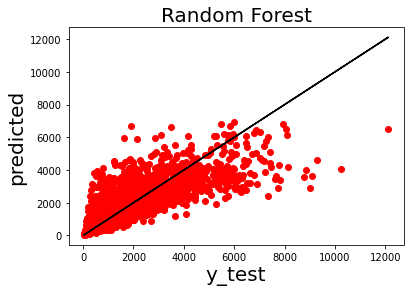

R2 score on test set= 0.56
MSE on test set= 1304088.16
RMSE on train set= 1141.97


In [37]:
from sklearn.ensemble import RandomForestRegressor
ran_regressor=RandomForestRegressor()
ran_regressor.fit(X_train,y_train)
#Plot for train set
import matplotlib.pyplot as plt
plt.title('Random Forest',fontsize=20)
plt.xlabel('y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(y_train,ran_regressor.predict(X_train), color='b')
plt.plot(y_train,y_train, color='black')

plt.show()

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print('R2 score on train set= %.2f' %r2_score(y_train,ran_regressor.predict(X_train)))
print('MSE on train set= %.2f' %mean_squared_error(y_train,ran_regressor.predict(X_train)))
print('RMSE on train set= %.2f' %sqrt(mean_squared_error(y_train,ran_regressor.predict(X_train))))

#PLot for test set

plt.title('Random Forest',fontsize=20)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(y_val,ran_regressor.predict(X_val), color='r')
plt.plot(y_val,y_val, color='black')

plt.show()

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on test set= %.2f' %r2_score(y_val,ran_regressor.predict(X_val)))
print('MSE on test set= %.2f' %mean_squared_error(y_val,ran_regressor.predict(X_val)))
print('RMSE on train set= %.2f' %sqrt(mean_squared_error(y_val,ran_regressor.predict(X_val))))


In [38]:
# example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

# prepare the model with input scaling
pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))

Mean RMSE: 1085.986


In [39]:
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

# prepare the model with input scaling
pipelineHB = Pipeline(steps=[('normalize', PowerTransformer()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipelineHB, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))

Mean RMSE: 1085.986


In [40]:
from sklearn.ensemble import RandomForestRegressor
# prepare the model with input scaling
pipelineRF = Pipeline(steps=[('normalize', PowerTransformer()), ('model', RandomForestRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipelineRF, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))

Mean RMSE: 1135.679


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
# prepare the model with input scaling
pipelineGB = Pipeline(steps=[('normalize', PowerTransformer()), ('model', GradientBoostingRegressor(min_samples_split=2, min_samples_leaf=4,max_depth=5,random_state=1, max_features=3, max_leaf_nodes=5))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipelineGB, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean RMSE: %.3f' % (s_mean))


Mean RMSE: 1153.212


# Prediction On Test Set